# ViscoIndent in Jupiter notebook
# Simulation of the Force vs Indentation curves

## 1. Importing Packages 


Some general Python libraries are required (numpy, matplotlib), as well as "ting_numerical" function which performs numerical simulation of a force vs indentation curve based on the Ting's model.

In [1]:
# Import of required libraries
import numpy as np
import matplotlib.pyplot as plt

from Ting_numerical import ting_numerical

## 2. Preparing data for the simulation 
To model a force vs indentation curve, we need to prescribe the properties of the indenter (probe shape and dimensions), the properties of the material (viscoelastic model and parameters, Poisson's ratio), and the indentation history (e.g. a triangular profile for the indenter movement).
We can start with the parameters of an indenter:

In [3]:
# parameters of the indenter:
modelprobe = 'sphere'
Radius = 1000

Then we can provide parameters of the material (sample). \
Possion = Poisson's ratio \
modelting = relaxation function, available funcrions can be found in the "relaxation_functions.py" file \
par = parameters of the relaxation function (viscoelastic parameters) \
par[0] = EHertz in elastic, E0 in SLS, E1 in PLR model \
par[1] = tau in SLS, alpha in PLR model \
par[2] = Einf in SLS \
... see full description in the "relaxation_functions.py" file \
Height = thickness of the sample (0=inf)


In [7]:
modelting = 'sPLR'
Poisson = 0.5
par = [10000, 0.1, 10, 1, 10]
Height = 0

Additional parameters for the adhesion can be inserted. Here, however, adhesion is turned off.

In [17]:
adhesion_pars = ['none', 'none', 0.00]

Finally, an indentation history. It is provided as a function of time. Here, a triangular profile for the indenter movement is created and shown as a function of time.

Text(0, 0.5, 'Indentation depth (nm)')

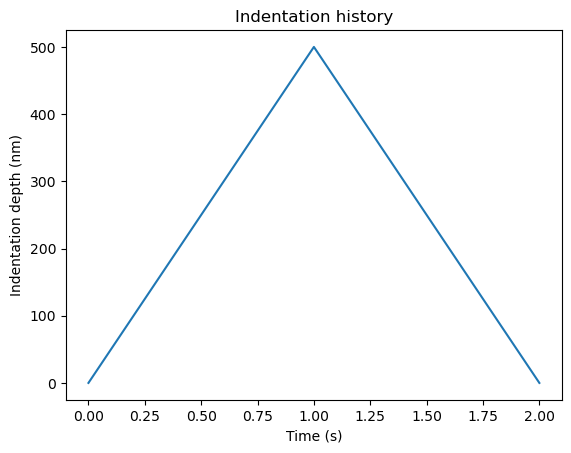

In [20]:
IndDepth = 500  # maximum indentation depth [nm]
MaxInd = 500  # number of points in approach phase
ApproachTime = 1  # duration of approach phase in seconds
IndSpeed = IndDepth/ApproachTime  # indentation speed [nm/s]
dT = 1/MaxInd  # time resolution
t = np.linspace(0, 2*ApproachTime, MaxInd*2+1)
indentationfull = np.piecewise(t, [t <= ApproachTime, t >= ApproachTime], [lambda t: t, lambda t: ApproachTime*2-t])
indentationfull = IndDepth*indentationfull
plt.plot(t, indentationfull)
plt.title('Indentation history')
plt.xlabel('Time (s)')
plt.ylabel('Indentation depth (nm)')

## 3. Similating the force vs indentation curve
Now the force vs distance curve can be simulated and results plotted.

Text(0, 0.5, 'Force (nN)')

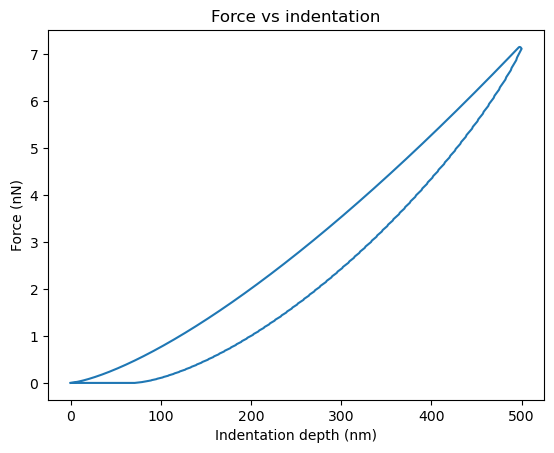

In [23]:
ForceT, cntrad, contact_time, t1_ndx, Et, ForceR = ting_numerical(par, adhesion_pars, 
Poisson, Radius, dT, MaxInd, Height, modelting, modelprobe, indentationfull)

plt.plot(indentationfull, ForceT)
plt.title('Force vs indentation')
plt.xlabel('Indentation depth (nm)')
plt.ylabel('Force (nN)')

Alternatively, we can plot Force vs time graph

Text(0, 0.5, 'Force (nN)')

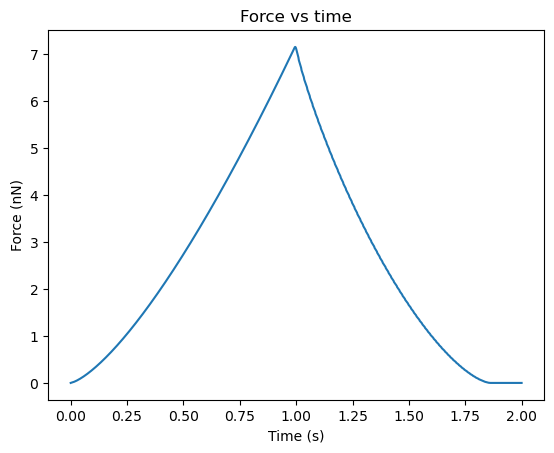

In [26]:
plt.plot(t, ForceT)
plt.title('Force vs time')
plt.xlabel('Time (s)')
plt.ylabel('Force (nN)')

## 4. Similating the force vs indentation curve with the indentation history constructor
Next, we will simulate the force curve with a slightly different function, which allows construction of a more complex indentation history in a automated way. Import "tingFC_constructor".

In [29]:
from tingFC_constructor import tingFC_constructor

Most of the used parameters described above and  in Ting_numerical.py \
Additional parameters are: \
    Pars['indpars'] - constructor for indentation history \
    indpars[0]:  [yes/no] 0 - use constructor, 1 - use provided indentation history \
    indpars[1]:  maximum indentation depth [nm] \
    indpars[2]:  indentation speed [nm/s] \
    indpars[3]:  number of points in approach phase \
    indpars[4]:  [ramp/sin] - 0 - ramp (triangular indentation profile), 1 - sinusoidal indentation profile \
    indpars[5]:  add dwell phase [s] \
    Pars['noise'] noise level relative to median force [%] (random.normal) \
    Pars['hydrodrag'] coefficient of viscous drag of the probe [nN*s/nm] \ 

Here, the indentation history will contain the dwell (constant indentation depth) phase with the force relaxation between approach and retraction phases.

In [40]:
Pars = {}
Pars['indpars'] = np.array([1, IndDepth, IndSpeed, MaxInd, 0, 0.5]) # last parameter is the dwell phase in [s]

Pars['probe_shape'] = modelprobe
Pars['probe_dimension'] = Radius

Pars['viscomodel'] = modelting
Pars['Vpars'] = par
Pars['Poisson'] = Poisson  # Poisson's ratio of the sample
Pars['dT'] = dT  # Sampling time (time step)
Pars['height'] = 0  # sample thickness
Pars['adhesion_model'] = 'none'
Pars['adhesion_region'] = 'none'
Pars['adhesion'] = 0  # max adhesion force

Noise level relative to median force [%] and coefficient of viscous drag of the probe [nN*s/nm] can also be included

In [43]:
Pars['noise'] = 3  # % noise level from median force
Pars['hydrodrag'] = 1e-5  # [nN*s/nm] coefficient of viscous drag

In [45]:
time, indentationfull, force, cradius, indentationfullL, forceL = tingFC_constructor(Pars, indentationfull)

Results can be plotted now

Text(0, 0.5, 'Force (nN)')

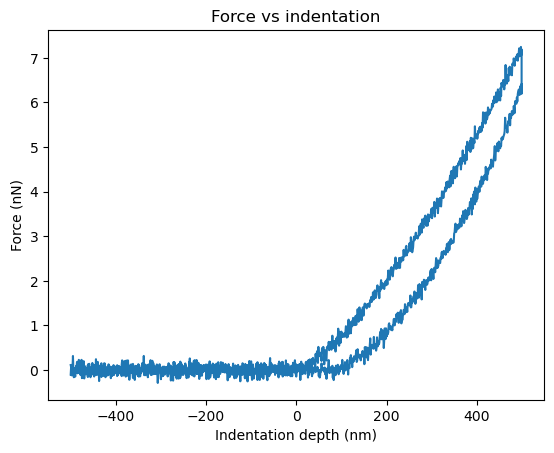

In [48]:
plt.plot(indentationfullL, forceL)
plt.title('Force vs indentation')
plt.xlabel('Indentation depth (nm)')
plt.ylabel('Force (nN)')

Text(0, 0.5, 'Time (s)')

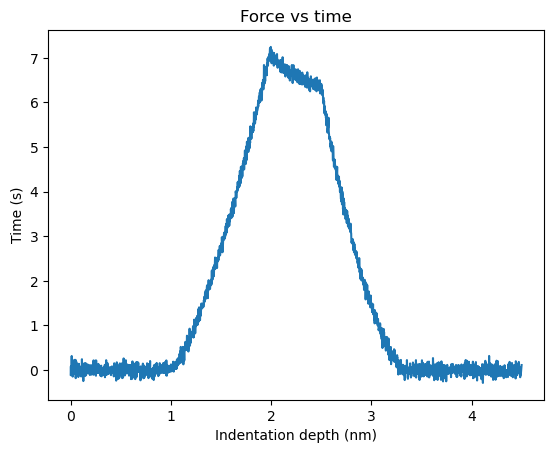

In [50]:
timeL = np.arange(0, len(forceL))*Pars['dT']
plt.plot(timeL, forceL)
plt.title('Force vs time')
plt.xlabel('Indentation depth (nm)')
plt.ylabel('Time (s)')

The curves can also be simulated via GUI "ViscoIndent", which has a similar functionality. Th GUI is launched via runfile command and will open in a separate window.

In [53]:
runfile('Viscoindent.py')

noapp


SystemExit: 0

C:\Programs2\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
